In [647]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('survey_results_public.csv')

In [648]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [649]:
df= df[['Country','EdLevel','Employment','YearsCodePro','ConvertedComp']]
df = df.rename({"ConvertedComp" : "Salary"},axis=1)
df.head()

,Country,EdLevel,Employment,YearsCodePro,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",27,NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,4,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,4,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,8,NaN


In [650]:
y = df['Salary']
df = df[y.notnull()]
df.head()

,Country,EdLevel,Employment,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,2,40070.0
11,Spain,Some college/university study without earning ...,Employed full-time,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",Employed full-time,20,38916.0


In [651]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
Employment      0
YearsCodePro    0
Salary          0
dtype: int64

In [652]:
df = df[df['Employment'] == "Employed full-time"]
df = df.drop('Employment', axis=1)
df

,Country,EdLevel,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,38916.0
...,...,...,...,...
64135,Denmark,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,38208.0
64148,Colombia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,19428.0
64152,United States,Some college/university study without earning ...,20,200.0
64153,Chile,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,15048.0


In [653]:
df['Country'].value_counts()

Country
United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: count, Length: 154, dtype: int64

In [654]:
# this is to remove countries with data less than 400
def shorten_categories(categories,cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "other"
    return categorical_map

In [655]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: count, dtype: int64

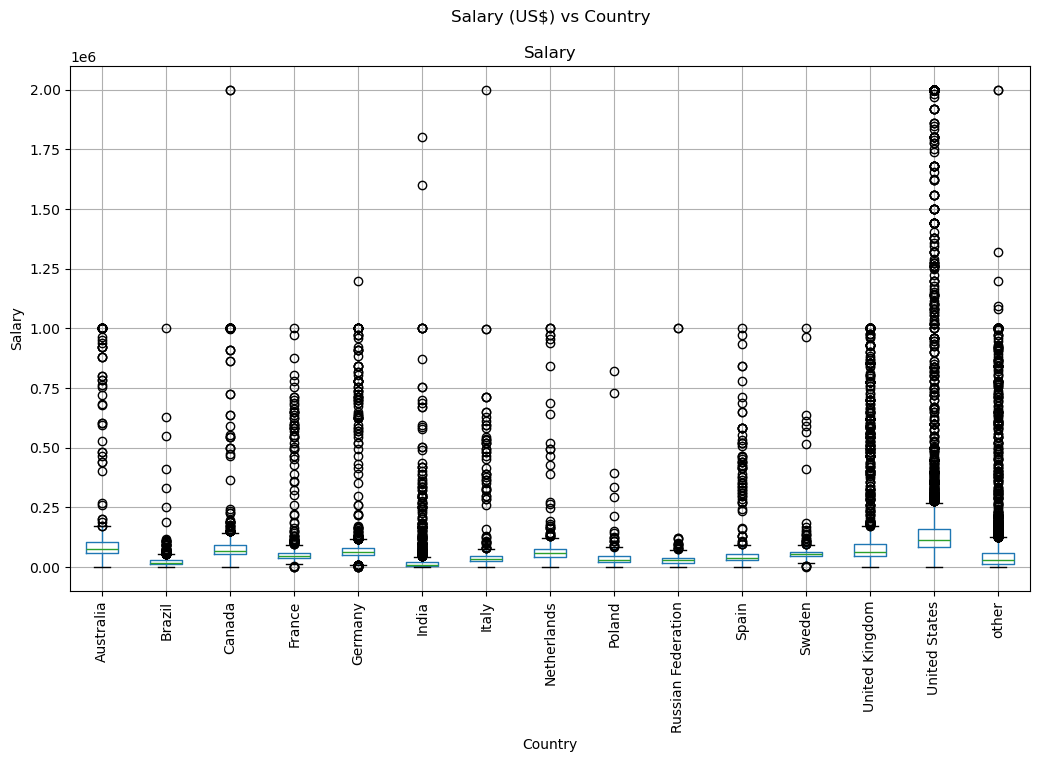

In [656]:
fig , ax = plt.subplots(1,1 , figsize=(12,7))
df.boxplot('Salary','Country', ax = ax)
plt.suptitle('Salary (US$) vs Country')
plt.title = ''
plt.ylabel('Salary')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

In [657]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 10000]
df = df[df['Country'] != 'other']

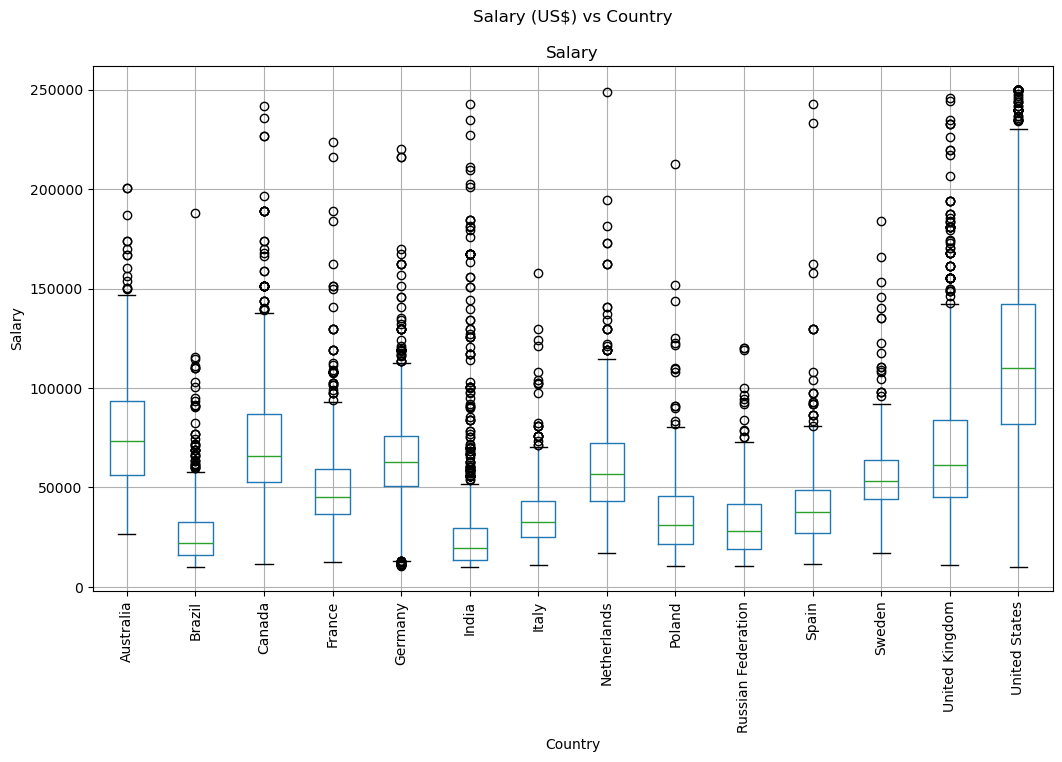

In [658]:
fig , ax = plt.subplots(1,1 , figsize=(12,7))
df.boxplot('Salary','Country', ax = ax)
plt.suptitle('Salary (US$) vs Country')
plt.title = ''
plt.ylabel('Salary')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()


In [659]:
df['YearsCodePro'].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [660]:
# this is to arrange up the yearsCoded
def clean_experience(x):
    if x == "More than 50 years":
        return 50
    elif x == 'Less than 1 year':
        return 0.5
    return float(x)

In [661]:
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [662]:
df['YearsCodePro'].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

In [663]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [664]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor`s Degree'
    if 'Master’s degree' in x:
        return 'Master`s Degree'
    if 'Professional degree' in x or 'Other doctoral degree' in x:
        return 'Post grad'
    return 'Less than a Bachelors'


In [665]:
df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [666]:
df['EdLevel'].unique()

array(['Bachelor`s Degree', 'Master`s Degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [667]:
# changing text to integers ( binary)
from sklearn.preprocessing import LabelEncoder
le_EdLevel = LabelEncoder()
df['EdLevel'] = le_EdLevel.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 2, 1, 3])

In [668]:
le_Country = LabelEncoder()
df['Country'] = le_Country.fit_transform(df['Country'])
df['Country'].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [669]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [670]:
# firstly using linearRegression for training
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X,y)

y_pred = linear_reg.predict(X)
y_pred


array([106018.93733735,  82106.73205223,  79484.560724  , ...,
        87512.69716018, 102025.26399317,  86842.05024016])

In [671]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

error = np.sqrt(mean_squared_error(y, y_pred))
error

39274.75368318509

In [672]:
# using DecisionTreeRegressor model alogrithm for training
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(X,y)
y_pred = dec_tree_reg.predict(X)

# testing the accuracy
error = np.sqrt(mean_squared_error(y, y_pred))
error

29414.938206831015

In [673]:
from sklearn.ensemble import RandomForestRegressor
rand_for_reg = RandomForestRegressor()
rand_for_reg.fit(X,y)

y_pred =rand_for_reg.predict(X)

error = np.sqrt(mean_squared_error(y , y_pred))
error

29493.264348551835

In [674]:
from sklearn.model_selection import GridSearchCV

max_depth = [None,2,4,6,8,10,12]
parameters = {"max_depth" : [18]}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters,scoring='neg_mean_squared_error')
gs.fit(X,y)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [18]}, scoring='neg_mean_squared_error')

In [675]:
regressor = gs.best_estimator_
regressor
regressor.fit(X,y)

y_pred = regressor.predict(X)

error = np.sqrt(mean_squared_error(y, y_pred))
error

29416.947280092267

In [676]:
X


,Country,EdLevel,YearsCodePro
7,13,0,13.0
9,12,2,4.0
10,12,0,2.0
11,10,1,7.0
12,7,1,20.0
...,...,...,...
64113,13,1,15.0
64116,13,0,6.0
64122,13,1,4.0
64127,13,3,12.0


In [685]:
X = np.array([['United States', 'Master`s Degree', 15 ]])
X

array([['United States', 'Master`s Degree', '15']], dtype='<U21')

In [686]:
X[:,0] = le_Country.transform(X[:,0])
X[:,1] = le_EdLevel.transform(X[:,1])
X = X.astype(float)
X

array([[13.,  2., 15.]])

In [687]:
y_pred = regressor.predict(X)
y_pred

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([146432.08510638])

In [ ]:
import pickle


In [691]:
# saving our model in pickle for deployment 
data = {"model" : regressor , "le_Country" : le_Country, "le_EdLevel" : le_EdLevel}
with open('model.pkl','wb') as file:
    data = pickle.dump(data,file)

In [692]:
# testing the saved pickle file
with open('model.pkl','rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data['model']
le_Country = data['le_Country']
le_EdLevel = data['le_EdLevel']

In [693]:
y_pred = regressor_loaded.predict(X)
y_pred

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([146432.08510638])